# Clustering et visualisation
Ce notebook  s'intéresse au clustering et à la visualisation des données pour l'étude de marché de "La poule qui chante". 

**Attention** : On utilise la méthode du K-means pour générer des clusters. Si l'on relance l'exécution du code, les noms des clusters du k-means risque de changer. Il faudra refaire les correspondances. 

# Sommaire

- [1 - Import des données](#1---Import-des-données)
  * [1.1 - ACP](#1.1---ACP)
  * [1.2 - Étude de marché](#1.2---Étude-de-marché)
- [2 - Clustering](#2---Clustering)
  * [2.1 - Déterminer le nombre de cluster](#2.1---Déterminer-le-nombre-de-cluster)
  * [2.2 - Clustering par la méthode K-means](#2.2---Clustering-par-la-méthode-K-means)
  * [2.3 - Clustering par la méthode du dendrogramme](#2.3---Clustering-par-la-méthode-du-dendrogramme)
  * [2.3 - Comparaison entre les cluster](#2.3---Comparaison-entre-les-cluster)
  * [2.4 -  Choix de la méthode de clustering](#2.4----Choix-de-la-méthode-de-clustering)
- [3 - Analyse des clusters](#3---Analyse-des-clusters)
  * [3.1 - Ajout des clusters dans le data frame 'Étude de marché'](#3.1---Ajout-des-clusters-dans-le-data-frame-'Étude-de-marché')
  * [3.2 - Analyse](#3.2---Analyse)
  * [3.3 - Détails du cluster choisi](#3.3---Détails-du-cluster-choisi)
- [4 - Résumé](#4---Résumé)

On importe les différentes librairies que l'on va utiliser.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as mc

import plotly.figure_factory as ff

# 1 - Import des données
On va importer les différentes tables de données suivantes que l'on a créées dans la partie « préparation » :
- La table `ACP`, avec les résultats de l'analyse en composantes principales
- La table `étude de marché` que l'on a nettoyé dans la partie précédente

## 1.1 - ACP

In [43]:
df_acp = pd.read_csv('df_acp.csv')
df_acp

,Besoin en viande,Difficulté à faire des affaires,Distance,Exportation,Zone
0,-0.738983,3.122627,-1.189105,-0.144602,Afghanistan
1,1.046265,-0.475614,-0.171710,-1.921082,Afrique du Sud
2,-0.534617,-0.598052,-0.733510,0.589773,Albanie
3,-0.559735,1.350289,-1.244908,0.516813,Algérie
4,2.039468,-2.672516,-2.302902,-1.787508,Allemagne
...,...,...,...,...,...
166,0.230081,-1.913928,-0.596028,-1.100927,Émirats arabes unis
167,-0.478484,0.428767,0.809286,-0.000600,Équateur
168,13.628951,0.002985,1.130871,4.067368,États-Unis d'Amérique
169,-0.548961,2.212360,-0.674626,-0.096609,Éthiopie


## 1.2 - Étude de marché

In [44]:
df_etude_marche = pd.read_csv('df_etude_marche.csv')
df_etude_marche

,Zone,Exportations (en millier de tonnes),Importations (en millier de tonnes),Nourriture (en millier de tonnes),Production(en millier de tonnes),Population en 2017 (en millier de personne),Stabilité politique,Code ISO3,Facilité du Business,dist
0,Afghanistan,0.0,29.0,55.0,28.0,36296.113,-2.80,AFG,38.9,5590.3810
1,Afrique du Sud,63.0,514.0,2035.0,1667.0,57009.756,-0.28,ZAF,65.4,9353.5520
2,Albanie,0.0,38.0,47.0,13.0,2884.169,0.38,ALB,64.2,1603.5340
3,Algérie,0.0,2.0,264.0,275.0,41389.189,-0.92,DZA,46.1,1340.3900
4,Allemagne,646.0,842.0,1609.0,1514.0,82658.409,0.59,DEU,79.6,439.8984
...,...,...,...,...,...,...,...,...,...,...
166,Émirats arabes unis,94.0,433.0,412.0,48.0,9487.203,0.62,ARE,77.4,5249.5350
167,Équateur,0.0,0.0,324.0,340.0,16785.361,-0.07,ECU,57.5,9367.0980
168,États-Unis d'Amérique,3692.0,123.0,18100.0,21914.0,325084.756,0.29,USA,83.6,5838.1570
169,Éthiopie,0.0,1.0,14.0,14.0,106399.924,-1.68,ETH,44.1,5582.5020


# 2 - Clustering
On va faire un clustering avec deux méthodes différentes pour voir si l'on a des résultats différents. Le cluster, il va nous permettre d'identifier les différents groupes de pays et de choisir un des groupes de pays avec lequel on peut travailler.

## 2.1 - Déterminer le nombre de cluster
On détermine le nombre de cluster avec une courbe d'inertie

In [45]:
# on sélectionne seulement les valeurs numériques
X = df_acp.select_dtypes(exclude='object')

liste_inertie = [ ]

k_list = range(1, 10) 
for k in k_list : 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)    
    liste_inertie.append(kmeans.inertia_)

On affiche le résultat sous forme de graphique

In [46]:
fig = px.line(liste_inertie, x= k_list, y= liste_inertie)
fig.update_layout(title="Inertie intra-classe en fonction du nombre de cluster")
fig.update_xaxes(title = "Nombre de cluster")
fig.update_yaxes(title = "Inertie")


fig.show()

Si l'on utilise la méthode du coude, on peut voir que cinq clusters sont suffisants. On voit que l'inertie chute énormément de 1 à 2 et commencer à ralentir au-delà de 5. Pour notre étude, on prendra cinq clusters.

## 2.2 - Clustering par la méthode K-means
Le k-means est un algorithme de clustering non supervisé qui consiste à diviser un ensemble de données en k groupes (ou clusters) pour minimiser la somme des distances intra-clusters. Cela implique de choisir k, le nombre de clusters, et de déterminer les centres de ces clusters, appelés centres de gravité ou moyennes. Chaque point de données est ensuite affecté au cluster dont le centre est le plus proche. Ce processus est répété jusqu'à ce que les affectations ne changent plus ou jusqu'à ce que la convergence soit atteinte.

On détermine les différents clusters, et l'on rajoute le résultat dans le dataframe de l'ACP.

In [47]:
# Détermination des 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Ajout de cluster dans le dataframe, sous la forme d'une variable qualitative
df_acp = df_acp.assign(kmeans = y_kmeans)
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
df_acp['kmeans'] = df_acp['kmeans'].map(mapping)
df_acp

,Besoin en viande,Difficulté à faire des affaires,Distance,Exportation,Zone,kmeans
0,-0.738983,3.122627,-1.189105,-0.144602,Afghanistan,D
1,1.046265,-0.475614,-0.171710,-1.921082,Afrique du Sud,E
2,-0.534617,-0.598052,-0.733510,0.589773,Albanie,C
3,-0.559735,1.350289,-1.244908,0.516813,Algérie,D
4,2.039468,-2.672516,-2.302902,-1.787508,Allemagne,E
...,...,...,...,...,...,...
166,0.230081,-1.913928,-0.596028,-1.100927,Émirats arabes unis,C
167,-0.478484,0.428767,0.809286,-0.000600,Équateur,A
168,13.628951,0.002985,1.130871,4.067368,États-Unis d'Amérique,B
169,-0.548961,2.212360,-0.674626,-0.096609,Éthiopie,D


On affiche les résultats du clustering, dans une matrice de graphique, à fin de faire correspondre les clusters à des groupes de pays identifiable.

In [48]:
fig = px.scatter_matrix(df_acp, 
                        dimensions=['Besoin en viande', 'Difficulté à faire des affaires',
                                    'Distance','Exportation'], 
                        color='kmeans', title='Matrice avec cluster', 
                        hover_name='Zone')

fig.update_layout(height=800)
fig.show()

Cette matrice nous permet d'identifier les différents clusters de pays et leurs grandes caractéristiques :

- Cluster A : Pays éloigné ;
- Cluster B : fort besoin en viande ;
- Cluster C : Proche et facile en business ;
- Cluster D : Difficulté à faire des affaires ;
- Cluster E : Forte demande en importation ;

On détermine les centroïdes

In [49]:
centroides = kmeans.cluster_centers_
centroides

array([[-0.39137477, -0.18055321, 1.08650294, -0.10821528],
 [11.92470749, 1.37383011, 1.04003991, 1.67848655],
 [-0.16022427, -1.21140064, -0.64746658, 0.48189175],
 [-0.49387485, 1.28657826, -0.47797334, 0.06065867],
 [ 1.97303636, -1.33076428, -1.20579 , -2.02609969]])

On va maintenant afficher les centroïdes sur les graphiques

In [50]:
fig = px.scatter(df_acp, x='Difficulté à faire des affaires', y='Besoin en viande', 
                 color='kmeans', hover_name='Zone')

x_lim, y_lim = np.abs(df_acp[['Difficulté à faire des affaires', 'Besoin en viande']]).max() * 1.1

fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 0],
                         mode='markers',marker=dict(size=10, color='black', symbol='diamond'),
                         name='Centroids'))

fig.update_layout(width=800, height=800, title="Projection des individus",
                  xaxis=dict(title='Difficulté à faire des affaires', range=[-x_lim, x_lim]),
                  yaxis=dict(title='Besoin en viande', range=[-y_lim, y_lim]),
                  hovermode='closest')
fig.show()



On peut s'apercevoir qu'il y a le cluster B qui a des forts besoins en viande. Toutefois, sauf les États-Unis, il est assez difficile de faire des affaires avec. Le cluster E à un besoin en viande plus important que les trois autres clusters restants, et en plus, il est facile de faire des affaires avec, mis à part pour l'inde. Pour le reste des clusters, le besoin en viande de volaille est moins important.

In [51]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Besoin en viande", "Difficulté à faire des affaires"))

fig.add_trace(go.Box(y= df_acp['Besoin en viande'], x= df_acp['kmeans']), row= 1, col= 1)
fig.add_trace(go.Box(y= df_acp['Difficulté à faire des affaires'], x =df_acp['kmeans']), row= 1, col= 2)
fig.update_layout(width=1000, height=600, showlegend = False)
fig.show()

On peut s'apercevoir que le cluster B a un fort besoin en viande, mais il est assez difficile de faire des affaire avec. Le cluster E a besoin en viande assez important par rapport aux clusters restants et en plus, il est assez facile de faire des affaires avec. Il est aussi assez simple de faire des affaires avec le cluster C. Il semble se dégager de ces deux graphiques que le cluster E est intéressant pour faire des affaires

On regarde les données sous un autre angle.

In [52]:
fig = px.scatter(df_acp, x='Difficulté à faire des affaires', y='Exportation', 
                 color='kmeans', hover_name='Zone')

x_lim, y_lim = np.abs(df_acp[['Difficulté à faire des affaires', 'Exportation']]).max() * 1.1

fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 0],
                         mode='markers', marker=dict(size=10, color='black', symbol='diamond'),
                         name='Centroids'))

fig.update_layout(width=800, height=800, title="Projection des individus",
                  xaxis=dict(title='Difficulté à faire des affaires', range=[-x_lim, x_lim]),
                  yaxis=dict(title='Exportation', range=[-y_lim, y_lim]),
                  hovermode='closest')
fig.show()

J'en profite pour rappeler ici que lorsque la valeur exportation est négative, cela veut dire que le pays importe la marchandise.

In [53]:
fig = px.box(df_acp, y = 'Exportation', x ='kmeans', color='kmeans')
fig.update_layout(width=600, height=600, title="disperstion des Exportations")
fig.show()

On peut voir que sur le cluster B, la dispersion est assez grande.  Cela doit être des pays producteurs de volaille qui exporte beaucoup et il y a aussi beaucoup d'importations. Cela doit être des pays qui font simultanément de l'importation et l'exportation, ils doivent acheter moins cher à certains petits producteurs pour les revendre plus chers à d'autres pays. Si l'on regarde le cluster E, on voit qu'ils font principalement de l'importation et comme vu précédent, c'était un cluster assez intéressant. Tandis que le cluster C fait essentiellement de l'exportation, donc même s'on fait facilement des affaires avec lui, il n'a pas grand besoin de notre production de volaille.

On va regarder ça sous l'angle 3D.

In [54]:
fig = px.scatter_3d(df_acp, 
                    x="Besoin en viande", 
                    y="Difficulté à faire des affaires", 
                    z= 'Exportation', 
                    color="kmeans", hover_name='Zone')

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0],
                           y=kmeans.cluster_centers_[:, 1],
                           z=kmeans.cluster_centers_[:, 3],
                           mode='markers', marker=dict(size=6, color='black', symbol='diamond'),
                           name='Centroides'))

fig.update_layout(width=1200, height=1200, title= "Projection des individus",
                  hovermode='closest')

fig.show()

On s'aperçoit que les conclusions précédentes sont valables sur ce graphique.

## 2.3 - Clustering par la méthode du dendrogramme
La méthode du dendrogramme est un algorithme de clustering hiérarchique qui regroupe les données en sous-groupes successifs en fonction de leur similarité. Il génère un arbre de liaison qui représente les relations de parenté entre les groupes de données, appelé dendrogramme. Les feuilles de l'arbre représentent les observations individuelles et les branches représentent les groupes formés à chaque étape de regroupement. La méthode du dendrogramme permet de déterminer la quantité optimale de clusters pour un ensemble de données en sélectionnant la coupure appropriée sur l'arbre.

In [55]:
Z = linkage(df_acp.select_dtypes(exclude='object'), method="ward")

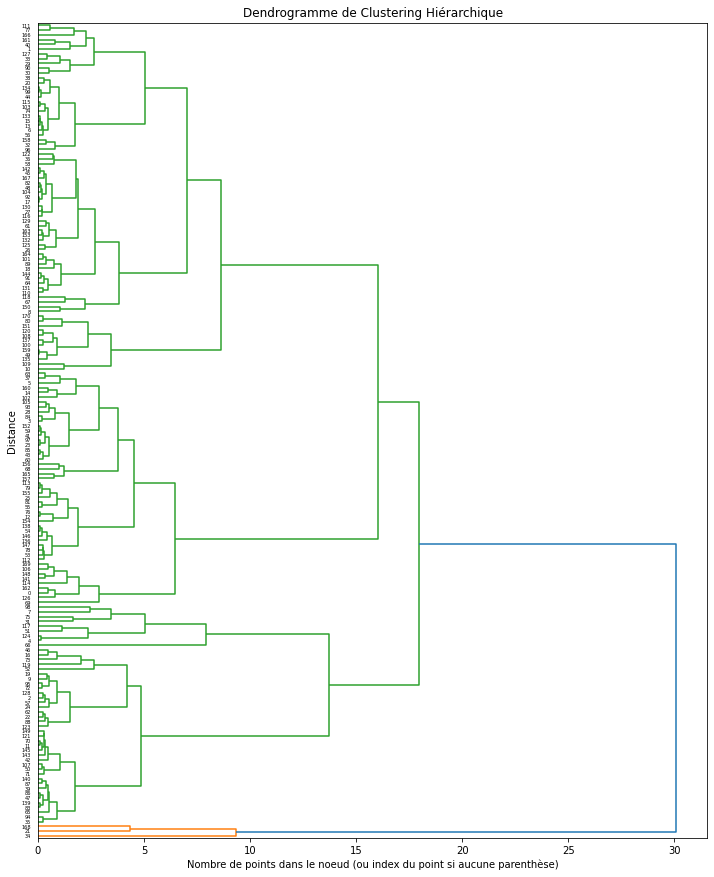

In [56]:
fig, ax = plt.subplots(figsize=(12, 15))
dendrogram(Z, ax=ax, orientation='right')
plt.title("Dendrogramme de Clustering Hiérarchique")
plt.xlabel("Nombre de points dans le noeud (ou index du point si aucune parenthèse)")
plt.ylabel("Distance")

plt.show()

Ce graphique est un peu illisible, on va reprendre le même paramètre que tout à l'heure, c'est-à-dire, on va utiliser cinq clusters.

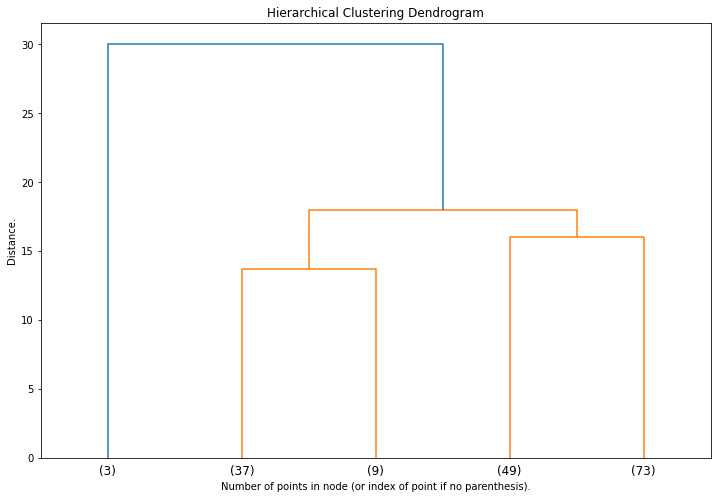

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

On rajoute les clusters dans le dataframe de l'ACP

In [58]:
clusters = cut_tree(Z, n_clusters=5)
df_acp['Dendrogramme'] = clusters
mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}
df_acp['Dendrogramme'] = df_acp['Dendrogramme'].map(mapping)
df_acp

,Besoin en viande,Difficulté à faire des affaires,Distance,Exportation,Zone,kmeans,Dendrogramme
0,-0.738983,3.122627,-1.189105,-0.144602,Afghanistan,D,a
1,1.046265,-0.475614,-0.171710,-1.921082,Afrique du Sud,E,b
2,-0.534617,-0.598052,-0.733510,0.589773,Albanie,C,c
3,-0.559735,1.350289,-1.244908,0.516813,Algérie,D,a
4,2.039468,-2.672516,-2.302902,-1.787508,Allemagne,E,d
...,...,...,...,...,...,...,...
166,0.230081,-1.913928,-0.596028,-1.100927,Émirats arabes unis,C,b
167,-0.478484,0.428767,0.809286,-0.000600,Équateur,A,b
168,13.628951,0.002985,1.130871,4.067368,États-Unis d'Amérique,B,e
169,-0.548961,2.212360,-0.674626,-0.096609,Éthiopie,D,a


On affiche les résultats du clustering, dans une matrice de graphique, à fin de faire correspondre les cluster à des groupes de pays identifiable.

In [59]:
df_acp['Dendrogramme'] = df_acp['Dendrogramme'].astype(object)
fig = px.scatter_matrix(df_acp, 
                        dimensions=['Besoin en viande',
                                    'Difficulté à faire des affaires',
                                    'Distance','Exportation'], 
                        color='Dendrogramme', title='Matrice avec cluster', 
                        hover_name='Zone')
fig.update_layout(height=800)
fig.show()

Cette matrice nous permet d'identifier les différents clusters de pays et leurs grandes caractéristiques :

- Cluster a : Difficulté à faire des affaires ;
- Cluster b : Pays éloigné ;
- Cluster c : Proche et facile en business ;
- Cluster d : forte demande en importation ;
- Cluster e : fort besoin en viande ;

On affiche les clusters sur un graphique 3D.

In [60]:
fig = px.scatter_3d(df_acp,  x="Besoin en viande", y="Difficulté à faire des affaires", z= 'Exportation', color="Dendrogramme", hover_name='Zone')

fig.update_layout(width=800, height=800,title= "Projection des individus", hovermode='closest')
fig.show()

On remarque un peu les mêmes observations que précédemment, c'est-à-dire que l'on a un cluster avec lequel on fait facilement du business. Sauf le pays de l'Inde où ils ont un besoin en viande et en plus, ils font de l'importation.

On fait correspondre les deux méthodes de clustering en mettant les mêmes numéros de cluster pour la même position dans le graphique des pays. Pour ça on va d'abord afficher les deux graphiques de chaque méthode et l'on va faire un tableau de correspondance.

In [61]:
fig = px.scatter(df_acp, x='Difficulté à faire des affaires', y='Exportation', color='kmeans')

fig.update_layout(width=300, height=300, title="Projection des individus",hovermode='closest')
fig.show()

In [62]:

fig = px.scatter(df_acp, x='Difficulté à faire des affaires', y='Exportation', color='Dendrogramme')

fig.update_layout(width=300, height=300, title="Projection des individus", hovermode='closest')
fig.show()

On va changer le nom des clusters de Dendrogramme pour les faire correspondre aux clusters de k-means

| Dendrogramme | K-means |
|:-------:|:------------:|
|    a    |       D      |
|    b    |       A      |
|    c    |       C      |
|    d    |       E      |
|    e    |       B      |

In [63]:
Correspondance = {'a': 'D', 'b': 'A', 'c': 'C', 'd': 'E', 'e': 'B'}
df_acp['Dendrogramme'] = df_acp['Dendrogramme'].apply(lambda x: Correspondance[x])

df_acp

,Besoin en viande,Difficulté à faire des affaires,Distance,Exportation,Zone,kmeans,Dendrogramme
0,-0.738983,3.122627,-1.189105,-0.144602,Afghanistan,D,D
1,1.046265,-0.475614,-0.171710,-1.921082,Afrique du Sud,E,A
2,-0.534617,-0.598052,-0.733510,0.589773,Albanie,C,C
3,-0.559735,1.350289,-1.244908,0.516813,Algérie,D,D
4,2.039468,-2.672516,-2.302902,-1.787508,Allemagne,E,E
...,...,...,...,...,...,...,...
166,0.230081,-1.913928,-0.596028,-1.100927,Émirats arabes unis,C,A
167,-0.478484,0.428767,0.809286,-0.000600,Équateur,A,A
168,13.628951,0.002985,1.130871,4.067368,États-Unis d'Amérique,B,B
169,-0.548961,2.212360,-0.674626,-0.096609,Éthiopie,D,D


## 2.3 - Comparaison entre les cluster

On va commencer par comparer les deux clusters de manière visuelle, et après, on fera les tests statistiques.

On affiche les différents plans factoriels pour voir si l'on a des différences identifiables

In [64]:
# Association du cluster et d'une couleur
color_map = {'A': '#636EFA', 'B': '#EF5F3B', 'C': '#00CC96', 'D': '#AB63FA', 'E': '#FFA15A'}
df_acp['kmeans_colors'] = df_acp['kmeans'].apply(lambda x: color_map[x])
df_acp['dendrogramme_colors'] = df_acp['Dendrogramme'].apply(lambda x: color_map[x])

# Création des graphiques
fig = make_subplots(rows=2, cols=2, subplot_titles=("Kmeans", "Dendrogramme",))

for i, clustering_method in enumerate(['kmeans', 'dendrogramme']):
    for j, y_col in enumerate(['Besoin en viande', 'Exportation']):
        fig.add_trace(
            go.Scatter(x=df_acp['Difficulté à faire des affaires'],
                       y=df_acp[y_col],
                       mode='markers',
                       marker=dict(color=df_acp[clustering_method + '_colors']),
                       name=clustering_method.capitalize(),
                       text=df_acp['Zone']),
            row=j+1, col=i+1)

fig.update_xaxes(title_text="Difficulté à faire des affaires")
fig.update_yaxes(title_text="Besoin en viande", row=1, col=1)
fig.update_yaxes(title_text="Exportation", row=2, col=1)
fig.update_layout(height=800, width=800, title_text="Comparaison méthode de clustering",showlegend=False)
fig.show()

On peut voir que de manière globale, on a à peu près les mêmes clusters. On va avoir certaines différences des pays qui vont appartenir à un certain cluster dans un cas est un autre cluster dans le deuxième méthode, mais globalement, on a approximativement les mêmes clusters.

On regarde les différences entre les deux méthodes de clustering. On commence par déterminer le nombre de pays dans chaque cluster.

In [65]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Kmeans", "Dendrogramme",),shared_yaxes=True)

fig.add_trace(go.Histogram(x=df_acp['kmeans'].sort_values()), row=1, col=1)
fig.add_trace(go.Histogram(x=df_acp['Dendrogramme'].sort_values()), row=1, col=2)
fig.update_layout(height=800, width=800, title_text="Comparaison méthode de clustering", showlegend = False)

fig.show()

Pour rappel:
- Cluster A : Pays éloigné ;
- Cluster B : fort besoin en viande ;
- Cluster C : Proche et facile en business ;
- Cluster D : Difficulté à faire des affaires ;
- Cluster E : Forte demande en importation ;

On avait vu que le cluster A était un bon cluster pour notre étude. Si l'on regarde les différences entre les deux méthodes de Christine, on voit que globalement la répartition est assez similaire. Par contre, on peut noter qu'il y a quelques différences sur le nombre de pays dans chaque cluster.

On fait la liste des pays de chaque cluster de chaque méthode et l'on détermine la différence.

In [66]:
df_cluster = df_acp.groupby('kmeans')['Zone'].apply(list).reset_index()
df_cluster.rename(columns={'kmeans': 'Cluster', 'Zone': 'kmeans' }, inplace=True)

df_cluster2 = df_acp.groupby('Dendrogramme')['Zone'].apply(list).reset_index()
df_cluster2.rename(columns={'Dendrogramme': 'Cluster', 'Zone': 'Dendrogramme'}, inplace=True)

df_cluster = df_cluster.merge(df_cluster2, how= 'left', on= 'Cluster')

def compare_lists(row):
    return list(set(row['kmeans']) - set(row['Dendrogramme']))


df_cluster['difference'] = df_cluster.apply(compare_lists, axis=1)
df_cluster

,Cluster,kmeans,Dendrogramme,difference
0,A,"[Antigua-et-Barbuda, Argentine, Australie, Bah...","[Afrique du Sud, Antigua-et-Barbuda, Argentine...",[]
1,B,"[Brésil, Chine, continentale, États-Unis d'Amé...","[Brésil, Chine, continentale, États-Unis d'Amé...",[]
2,C,"[Albanie, Arménie, Autriche, Belgique, Bosnie-...","[Albanie, Arménie, Autriche, Belgique, Bosnie-...","[Canada, Oman, Koweït, Kazakhstan, Émirats ara..."
3,D,"[Afghanistan, Algérie, Angola, Azerbaïdjan, Ba...","[Afghanistan, Algérie, Angola, Azerbaïdjan, Ba...","[Malawi, Madagascar, Suriname, Mozambique, Phi..."
4,E,"[Afrique du Sud, Allemagne, Arabie saoudite, C...","[Allemagne, Arabie saoudite, Chine - RAS de Ho...","[Afrique du Sud, Fédération de Russie]"


On vient de voir, que dans les deux clusters, il y avait des différences sur le choix des pays. Il y a le cluster A et B qui sont sans différence dans le choix des pays. Nous allons continuer notre étude pour choisir la meilleure méthode de clustering.

## 2.4 -  Choix de la méthode de clustering
On va utiliser des métriques d'évaluation de performance afin d'évaluer nos deux méthodes de clustering et leur qualité. La première métrique, on utilisera le coefficient de Calinski-Harabasz et la seconde métrique, on utilisera l'indice de  silhouette.

In [67]:
from sklearn.metrics import calinski_harabasz_score

ch_score_kmeans = calinski_harabasz_score(df_acp.select_dtypes(exclude='object'), df_acp['kmeans'])
print("Coefficient de Calinski-Harabasz pour la méthode du k-means : ", ch_score_kmeans)

ch_score_dendrogramme = calinski_harabasz_score(df_acp.select_dtypes(exclude='object'), df_acp['Dendrogramme'])
print("Coefficient de Calinski-Harabasz pour la méthode du dendrogramme :  ", ch_score_dendrogramme)

Coefficient de Calinski-Harabasz pour la méthode du k-means :  117.72154665623303
Coefficient de Calinski-Harabasz pour la méthode du dendrogramme :   106.85075757577668


Ce coefficient mesure la qualité des clusters en comparant la variabilité des données à l'intérieur de chaque cluster, à la variabilité entre les clusters. Plus la valeur est élevée, meilleur et la qualité des clusters. On peut voir que la méthode du k-means à une valeur plus élevé donc de meilleur cluster.

In [68]:
from sklearn.metrics import silhouette_score

silhouette_score_kmeans = silhouette_score(df_acp.select_dtypes(exclude='object'), df_acp['kmeans'])
print("Indice de silhouette pour la méthode du k-means : ", silhouette_score_kmeans)

silhouette_score_dendrogramme = silhouette_score(df_acp.select_dtypes(exclude='object'), df_acp['Dendrogramme'])
print("Indice de silhouette pour la méthode du dendrogramme : ", silhouette_score_dendrogramme)

Indice de silhouette pour la méthode du k-means :  0.36909151785149313
Indice de silhouette pour la méthode du dendrogramme :  0.336195328187011


Cette méthode mesure la similarité des observations entre elles dans le même cluster par rapport à celle d'un autre cluster. Celle-ci varie entre -1 et 1, où une valeur plus proche de un signifie que les observations sont plus similaires entre elles dans le même cluster que les observations dans un autre cluster. On peut voir encore une fois que la méthode du k-means est plus performante que celle du dendrogramme

Pour la suite de l'étude, on gardera la méthode du k-means

# 3 - Analyse des clusters
## 3.1 - Ajout des clusters dans le data frame 'Étude de marché'
On ajoute les clusters ainsi que les résultats de l'analyse par composante principale dans le dataframe `Étude de marché`.

In [69]:
df_etude_marche = df_etude_marche.merge(df_acp, how='left', on= 'Zone')
df_etude_marche.drop(columns= {'Dendrogramme', 'dendrogramme_colors'}, inplace=True)
df_etude_marche

,Zone,Exportations (en millier de tonnes),Importations (en millier de tonnes),Nourriture (en millier de tonnes),Production(en millier de tonnes),Population en 2017 (en millier de personne),Stabilité politique,Code ISO3,Facilité du Business,dist,Besoin en viande,Difficulté à faire des affaires,Distance,Exportation,kmeans,kmeans_colors
0,Afghanistan,0.0,29.0,55.0,28.0,36296.113,-2.80,AFG,38.9,5590.3810,-0.738983,3.122627,-1.189105,-0.144602,D,#AB63FA
1,Afrique du Sud,63.0,514.0,2035.0,1667.0,57009.756,-0.28,ZAF,65.4,9353.5520,1.046265,-0.475614,-0.171710,-1.921082,E,#FFA15A
2,Albanie,0.0,38.0,47.0,13.0,2884.169,0.38,ALB,64.2,1603.5340,-0.534617,-0.598052,-0.733510,0.589773,C,#00CC96
3,Algérie,0.0,2.0,264.0,275.0,41389.189,-0.92,DZA,46.1,1340.3900,-0.559735,1.350289,-1.244908,0.516813,D,#AB63FA
4,Allemagne,646.0,842.0,1609.0,1514.0,82658.409,0.59,DEU,79.6,439.8984,2.039468,-2.672516,-2.302902,-1.787508,E,#FFA15A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Émirats arabes unis,94.0,433.0,412.0,48.0,9487.203,0.62,ARE,77.4,5249.5350,0.230081,-1.913928,-0.596028,-1.100927,C,#00CC96
167,Équateur,0.0,0.0,324.0,340.0,16785.361,-0.07,ECU,57.5,9367.0980,-0.478484,0.428767,0.809286,-0.000600,A,#636EFA
168,États-Unis d'Amérique,3692.0,123.0,18100.0,21914.0,325084.756,0.29,USA,83.6,5838.1570,13.628951,0.002985,1.130871,4.067368,B,#EF5F3B
169,Éthiopie,0.0,1.0,14.0,14.0,106399.924,-1.68,ETH,44.1,5582.5020,-0.548961,2.212360,-0.674626,-0.096609,D,#AB63FA


## 3.2 - Analyse
On reprend les variables de notre ACP, et l'on fait une analyse en fonction des clusters.

In [70]:
variables_acp = ['Besoin en viande', 'Difficulté à faire des affaires', 'Distance', 'Exportation']

fig = make_subplots(rows=2, cols=2, subplot_titles=variables_acp)

for i, variable in enumerate(variables_acp):
    fig.add_trace(go.Box(x=df_etude_marche['kmeans'], y=df_etude_marche[variable]), 
                  row=(i//2)+1, col=(i%2)+1)

fig.update_layout(width=1000, height= 800, showlegend= False)

fig.show()



On voit quelques tendances se dessiner sur certains clusters.  par exemple, cluster E qui a une très fort demande en importation et d'autres où il est facile de faire des affaires. Mais, comme on est une dispersion, on va utiliser des tests de corrélation comme ANOVA ou le Tukey pour définir si l'on est vraiment des clusters qui ressortent ou pas.

In [71]:
colonnes = ['Besoin en viande', 'Exportation', 'Difficulté à faire des affaires','Distance' ]


# Test Anova
for colonne in colonnes:
    valeurs = df_etude_marche['kmeans'].unique()
    nb_valeur = len(valeurs)

    listes = []

    for i in range(len(valeurs)):
        listes.append(df_etude_marche[df_etude_marche['kmeans'] == valeurs[i]][colonne])

    fvalue, pvalue = st.f_oneway(*listes)

    print(f"p-value pour la colonne {colonne} : {pvalue}")
    print(f"F-value pour la colonne {colonne} : {fvalue}")

p-value pour la colonne Besoin en viande : 2.407008858010752e-88
F-value pour la colonne Besoin en viande : 455.58028511031375
p-value pour la colonne Exportation : 1.2821221006555952e-19
F-value pour la colonne Exportation : 31.706572414925425
p-value pour la colonne Difficulté à faire des affaires : 1.4222647984673905e-34
F-value pour la colonne Difficulté à faire des affaires : 69.83301445093286
p-value pour la colonne Distance : 2.6062456400903738e-36
F-value pour la colonne Distance : 75.36750765151967


Le test ANOVA nous permet de voir qu'il y a au moins un des clusters sur chacune des variables qui est significativement différent des autres. On peut voir ça parce que le p-value est très inférieur à 0,05.

In [72]:
colonnes = ['Besoin en viande', 'Exportation', 'Difficulté à faire des affaires','Distance' ]

for colonne in colonnes:
    groupes = df_etude_marche.groupby(['kmeans'])

    mod = mc.MultiComparison(df_etude_marche[colonne], df_etude_marche['kmeans'])
    res = mod.tukeyhsd()

    print(f"Résultats du test de Tukey pour la colonne {colonne} :")
    print(res)

Résultats du test de Tukey pour la colonne Besoin en viande :
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B  12.3161  0.001  11.4669  13.1653   True
     A      C   0.2312 0.1844  -0.0585   0.5208  False
     A      D  -0.1025 0.8058  -0.3702   0.1652  False
     A      E   2.3644  0.001   1.8932   2.8356   True
     B      C -12.0849  0.001 -12.9424 -11.2275   True
     B      D -12.4186  0.001 -13.2689 -11.5683   True
     B      E  -9.9517  0.001 -10.8862  -9.0171   True
     C      D  -0.3337 0.0168  -0.6265  -0.0408   True
     C      E   2.1333  0.001   1.6473   2.6192   True
     D      E   2.4669  0.001   1.9937   2.9401   True
------------------------------------------------------
Résultats du test de Tukey pour la colonne Exportation :
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
-----

On a des clusters significativement différents des autres

On fait un tableau, récapitulatif
| Cluster | Commentaire |
|:-------:|:------------|
|    A    | Les pays de ce cluster non pas une forte demande en importation, mais on fait facilement du business avec eux  |
|    B    | Les pays le plus peuplés. Il faut beaucoup de production et d'exportation. De plus, je pense que s'ils font de l'importation, c'est dans le but de le revendre|
|    C    | Faire du business avec eux est facile, mais ils ont moins de besoin en viande de volaille |
|    D    | Il est difficile de faire du business avec eux |
|    E    | Ils ont une forte demande en importation et faire du business avec eux est assez facile |

On peut choisir en priorité le cluster E, car il a une forte demande en importation et faire du business avec lui est assez facile. 
Par la suite, on pourra aussi regarder le cluster A. En effet, faire du business avec eux est assez simple toutefois ils ont un peu moins de besoin en viande de volaille.

## 3.3 - Détails du cluster choisi

On va lister les pays de ce cluster

In [75]:
df_cluster_choisi = df_etude_marche[df_etude_marche['kmeans']=='E']
df_cluster_choisi.drop(columns= {'kmeans','kmeans_colors'}, inplace= True)

Voici la liste des pays :

In [76]:
df_cluster_choisi['Zone']

1 Afrique du Sud
4 Allemagne
7 Arabie saoudite
31 Chine - RAS de Hong-Kong
51 France
52 Fédération de Russie
66 Inde
75 Japon
98 Mexique
117 Pays-Bas
124 Royaume-Uni de Grande-Bretagne et d'Irlande du...
Name: Zone, dtype: object

Il y a 10 pays dans ce cluster, si l'on exclu la France.

In [77]:
fig = px.scatter(df_cluster_choisi, x= 'Exportation', y= 'Difficulté à faire des affaires', hover_name='Zone', text='Zone',
                 color='dist', color_continuous_scale= 'Blugrn')
fig.update_traces(textposition="top center")
fig.update_traces(marker_size=15)

fig.show()

On voit bien sur ce graphique qu'il y a des pays plus demandeurs de viande que l'autre. En plus, la plupart des pays, mis à part l'Inde, ont une facilité à faire des affaires. On pourrait commencer par s'occuper des pays assez proche de nous comme les Pays-Bas ou l'Allemagne ou le Royaume-Uni, et continuer en mettant en place une stratégie vers le Japon et Hong Kong.

In [78]:
fig = px.scatter(df_cluster_choisi, x= 'Besoin en viande', y= 'Difficulté à faire des affaires', hover_name='Zone',
                 color='dist', color_continuous_scale= 'Blugrn',text='Zone')
fig.update_traces(textposition="top center")
fig.update_traces(marker_size=15)
fig.show()

In [79]:
fig = px.scatter_3d(df_cluster_choisi, x= 'Besoin en viande', y= 'Difficulté à faire des affaires', z='Exportation', 
                    hover_name='Zone', color='dist',
                    color_continuous_scale= 'Blugrn')
fig.update_traces(textposition="top center")
fig.show()

On a ici un cluster qui a une demande en importation de viande de volaille et en plus, il se fait facilement du business. Nous avons une offre de viande de volaille. Cela pourrait bien matcher avec ce cluster. Voici les différents éléments qui composent le cluster.

In [80]:
df_cluster_choisi

,Zone,Exportations (en millier de tonnes),Importations (en millier de tonnes),Nourriture (en millier de tonnes),Production(en millier de tonnes),Population en 2017 (en millier de personne),Stabilité politique,Code ISO3,Facilité du Business,dist,Besoin en viande,Difficulté à faire des affaires,Distance,Exportation
1,Afrique du Sud,63.0,514.0,2035.0,1667.0,57009.756,-0.28,ZAF,65.4,9353.5520,1.046265,-0.475614,-0.171710,-1.921082
4,Allemagne,646.0,842.0,1609.0,1514.0,82658.409,0.59,DEU,79.6,439.8984,2.039468,-2.672516,-2.302902,-1.787508
7,Arabie saoudite,10.0,722.0,1435.0,616.0,33101.179,-0.64,SAU,59.4,4694.5000,0.707743,-0.496634,-1.740741,-2.407079
31,Chine - RAS de Hong-Kong,663.0,907.0,391.0,24.0,7306.322,0.83,HKG,84.8,9639.4760,1.337174,-3.088369,-0.449848,-2.672575
51,France,501.0,506.0,1485.0,1750.0,64842.509,0.28,FRA,76.3,278.1876,1.484764,-1.770828,-1.836087,-0.621108
52,Fédération de Russie,115.0,226.0,4509.0,4444.0,145530.082,-0.64,RUS,75.3,2494.3160,2.381074,-0.199999,-1.099064,-0.269792
66,Inde,4.0,0.0,2965.0,3545.0,1338676.785,-0.76,IND,55.9,6594.2300,4.203057,2.991288,0.087454,-2.935418
75,Japon,10.0,1069.0,2359.0,2215.0,127502.725,1.11,JPN,77.9,9725.6290,2.100362,-2.815310,-0.540260,-4.108356
98,Mexique,9.0,972.0,4058.0,3249.0,124777.324,-0.80,MEX,72.4,9206.8130,2.594923,-0.961850,-1.195470,-3.819840
117,Pays-Bas,1418.0,608.0,346.0,1100.0,17021.347,0.92,NLD,75.6,427.9169,1.910797,-2.560149,-1.732932,0.040126


On peut regarder ça de manière un peu plus visuelle.

In [81]:
col_names = ['Exportations (en millier de tonnes)','Importations (en millier de tonnes)',              
             'Nourriture (en millier de tonnes)', 'Production(en millier de tonnes)',             
             'Stabilité politique', 'Facilité du Business',             
             'Population en 2017 (en millier de personne)', 'dist']

fig = make_subplots(rows= 4, cols= 2, shared_yaxes=True, subplot_titles=col_names)

for i, col_name in enumerate(col_names):
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(go.Bar(y=df_cluster_choisi['Zone'], 
                         x=df_cluster_choisi[col_name],
                         orientation='h',
                         text=df_cluster_choisi[col_name].apply(lambda x: f"{x:.2f}"),
                         textposition='auto'),
                  row=row, col=col)

fig.update_layout(showlegend=False, height=1900)
fig.show()

On remarque dans ce cluster, l'Inde est quand même un pays à part, ils ont une impressionnante population, mais ils ne font pas d'importation ou pas encore. D'autres pays membres de l'espace Schengen serait intéressant de travailler avec eux pour la facilité du business de la zone. 

# 4 - Résumé
On a vu qu'il existe un cluster où il est facile de faire du business et en plus ils ont une demande en importation de viande de volaille. Ce cluster c'est le cluster E, et il est composé des pays suivants.

In [82]:
df_cluster_choisi['Zone'].unique()

array(['Afrique du Sud', 'Allemagne', 'Arabie saoudite',
 'Chine - RAS de Hong-Kong', 'France', 'Fédération de Russie',
 'Inde', 'Japon', 'Mexique', 'Pays-Bas',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],
 dtype=object)

Dans ce cluster, il y a des pays où il est facile de travailler avec eux parce qu'ils font partie de l'espace Schengen, c'est l'Allemagne et les Pays-Bas. Le Royaume-Uni est aussi un pays qui va être assez simple de travailler avec eux. En effet, il y a une certaine affinité de business, malgré le Brexit, comme ils ont fait partie de l'Union européenne.

La proximité entre le Japon et Hong Kong pourrait nous permettre de faire une pierre, deux coups sur le transport des volailles. Il est assez simple de transporter les volailles d'un pays à l'autre.

L'Inde est un cas à part, elle a une énorme population à nourrir, mais ne fait aucune importation. Pourquoi ? Est-ce que la filière locale est meilleur marché ?

Pour les autres pays, il faut le faire furent à mesure.